In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time

belirli boyutlardaki kare matrisin SVD'sinin hesaplanma süresini ölçmek için kullanılan bir zamanlama deneyini gerçekleştirir. İlk olarak, bir maksimum boyut belirlenir ve bu boyuta kadar lineer olarak uzanan bir boyut listesi oluşturulur. Ardından, belirli boyutlarda SVD hesaplamaları yapılır ve her boyut için hesaplama süresi kaydedilir. Deneyin sonuçları daha sonra hesaplanan sürelerin boyutlara karşı çizimini gösteren bir grafik olarak görselleştirilir.

In [2]:
# create random square matrix
ndim_max = 1000
A = np.random.randn(ndim_max,ndim_max)

In [3]:
# set up list of dimension lengths
npoint = 6
array_ndim = np.linspace(500,1000,npoint)
# create initial array of zeros for time calculation
array_time = np.zeros((npoint))
# repeat experiment nrun times to smooth out results
nrun = 10
# record time to compute svd of A[0:ndim,0:ndim] over nrun cases
for i in range(npoint):
    ndim = int(array_ndim[i])
    time_start = time.time()
    for count in range(nrun):
        np.linalg.svd(A[0:ndim,0:ndim])
    time_end = time.time()
    array_time[i] = time_end - time_start

array_ndim ve array_time listelerindeki verilerin logaritmalarını alır ve bunları x ve y eksenlerine koyarak log-log çizgi grafiği çizer.

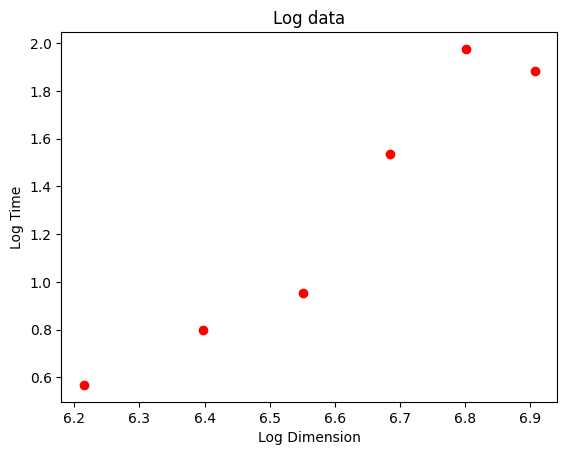

In [4]:
plt.figure()
log_ndim = np.log(array_ndim)
log_time = np.log(array_time)
plt.title("Log data")
plt.xlabel("Log Dimension")
plt.ylabel("Log Time")
plt.plot(log_ndim,log_time,"ro")
plt.show()

SVD hesaplamalarının boyutu arttıkça zamanını ölçer ve elde edilen verilerin logaritmik ölçekli boyutlarına ve buna karşılık gelen logaritmik zamanlarına dayalı olarak bir doğrusal regresyon gerçekleştirir. Bu regresyon, verilerin eğilimini görselleştirmek için kullanılır.

Coefficients: [  2.19803462 -13.20554695]
Complexity power: 2.198034622409071


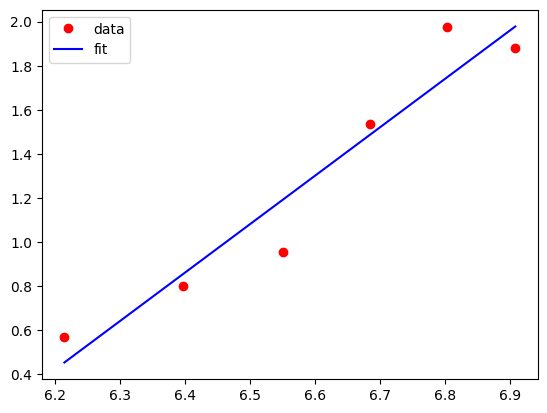

In [5]:
# fit log ndim/log time data to linear function using polyfit input 1 means fit to linear function
coeff = np.polyfit(log_ndim,log_time,1)
print("Coefficients: {}".format(coeff))
print("Complexity power: {}".format(coeff[0]))
# create polynomial(linear function) based on coefficients
p = np.poly1d(coeff)
plt.figure()
# plot log_ndim log_time data
plt.plot(log_ndim,log_time,"ro",label="data")
# plot log_ndim versus polynomial p evaluated at log_ndim points
plt.plot(log_ndim,p(log_ndim),"b-",label="fit")
plt.legend()
plt.show()